In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', rc={'figure.figsize':(10,8)})

# (14.1) Pade approximants

We know the Taylor series expansion fo $e^x$:

$$
e^x = \sum_{l = 1}^{\infty}\frac{x^l}{l!}
$$

We first find the $b_m$ by solving the linear equation system defined be (14.7), then caulculating each $a_n$ by taking our known $b_m$ and applying (14.6)

For some intuition, he linear system (14.7) for $N = M = 1$ looks like:

$$
c_1 b_1 = -c_2
$$

For $N = M = 1$:

$$
c_2 b_1 + c_1 b_2 = -c_3 \\ 
c_3 b_1 + c_2 b_2 = -c_4
$$

For $N = M = 2$:

$$
c_3 b_1 + c_2 b_2 + c_1 b_3 = -c_4 \\ 
c_4 b_1 + c_3 b_2 + c_2 b_3 = -c_5 \\ 
c_5 b_1 + c_4 b_2 + c_3 b_3 = -c_6 
$$
 
...

In [35]:
def pade_approximants(N, M):
    # precalculate the factorials
    c = np.zeros(N + M + 2)
    for i in range(N + M + 2):
        c[i] = 1 / np.math.factorial(i)
    
    # first, let's find the b's, by (14.7)
    v = np.zeros(M)
    for i in range(M):
        v[i] = -c[M + i + 1]
    
    A = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            A[i, j] = c[i + N - j]
    
    Ainv = np.linalg.inv(A)
    b = Ainv.dot(v)
    
    # now find the a's, by (14.6)
    a = np.zeros(N + 1)
    for i in range(N + 1):
        a[i] = c[i]
        for j in range(i):
            a[i] += b[j] * c[i - j - 1]
    
    return a, b

In [36]:
def pade_approximate(x, a, b):
    nom = 0
    denom = 0
    for i in range(len(a)):
        nom += a[i] * (x ** i)
    for i in range(len(b)):
        denom += b[i] * (x ** (i + 1))
    approx = nom / (1 + denom)
    return approx

In [37]:
x = 1
real_e = 2.718281828459045
for i in range(1, 6):
    N = i
    M = i
    print("** Pade Approximants [%d/%d] **\n" % (M, N))
    
    a, b = pade_approximants(N, M)
    print("a: ", a)
    print("b: ", b)
    
    print("Approximation for e^1:")
    approx_e = pade_approximate(x, a, b)
    print(approx_e)
    print("Error:")
    print(abs(real_e - approx_e))
    print("\n\n")

** Pade Approximants [1/1] **

a:  [1.  0.5]
b:  [-0.5]
Approximation for e^1:
3.0
Error:
0.2817181715409549



** Pade Approximants [2/2] **

a:  [1.         0.5        0.08333333]
b:  [-0.5         0.08333333]
Approximation for e^1:
2.714285714285714
Error:
0.003996114173331122



** Pade Approximants [3/3] **

a:  [1.         0.5        0.1        0.00833333]
b:  [-0.5         0.1        -0.00833333]
Approximation for e^1:
2.7183098591549295
Error:
2.8030695884417867e-05



** Pade Approximants [4/4] **

a:  [1.00000000e+00 5.00000000e-01 1.07142857e-01 1.19047619e-02
 5.95238095e-04]
b:  [-0.5         0.10714286 -0.01190476  0.00059524]
Approximation for e^1:
2.7182817182817187
Error:
1.1017732637341737e-07



** Pade Approximants [5/5] **

a:  [1.00000000e+00 5.00000000e-01 1.11111111e-01 1.38888889e-02
 9.92063492e-04 3.30687831e-05]
b:  [-5.00000000e-01  1.11111111e-01 -1.38888889e-02  9.92063492e-04
 -3.30687831e-05]
Approximation for e^1:
2.7182818287356953
Error:
2.7665025825

# (14.2)


## (a) Polynomial fitting

X: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
Y: [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


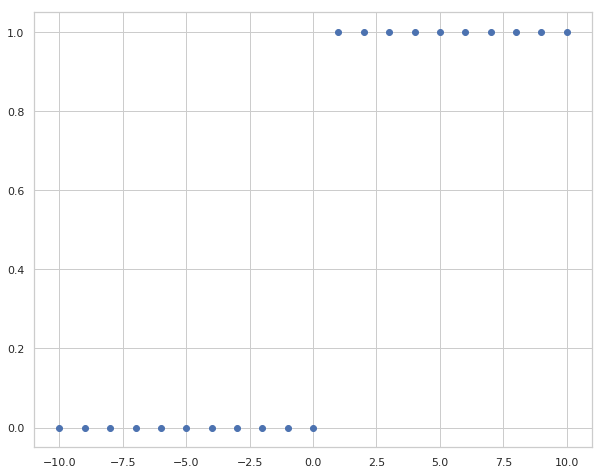

In [375]:
X = np.array(range(-10, 11))
print("X:", X)
Y = np.array([0 if x <= 0 else 1 for x in X])
print("Y:", Y)

plt.plot(X, Y, 'o')
plt.show()

In [376]:
def polynom_fit(X, Y, M):
    N = len(Y)
    # generate Vandermonde
    vandermonde = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            vandermonde[i, j] = X[i] ** j
    # get pseudo inverse
    vandermonde_pinv = np.linalg.pinv(vandermonde)
    # get coefficients
    coeff = vandermonde_pinv.dot(Y)
    return coeff

def polynom_predict(x, coeff):
    result = 0
    for i in range(len(coeff)):
        result += coeff[i] * (x ** i)
    return result

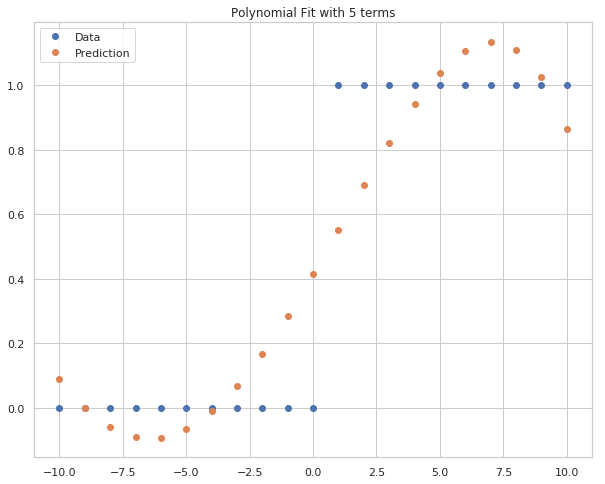

Mean squared error (in sample): 0.03394089901406786


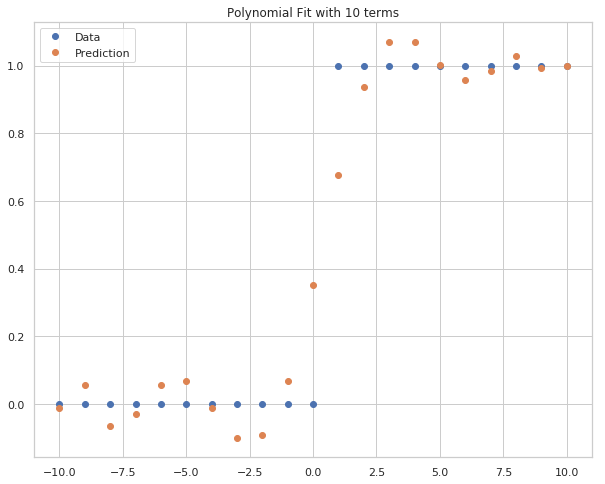

Mean squared error (in sample): 0.013509963284611574


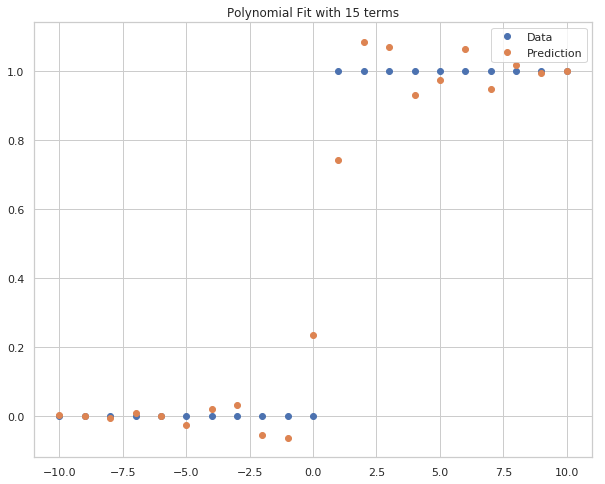

Mean squared error (in sample): 0.007418481265720188


In [377]:
for rank in [5, 10, 15]:
    coeff = polynom_fit(X, Y, rank)
    predict = np.array([polynom_predict(x, coeff) for x in X])
    
    plt.plot(X, Y, 'o')
    plt.plot(X, predict, 'o')
    plt.legend(['Data', 'Prediction'])
    plt.title("Polynomial Fit with %d terms" % rank)
    plt.show()
    
    error = np.mean((predict - Y) ** 2)
    print("Mean squared error (in sample):", error)

## (b) RBF

In [378]:
def RBF_fit(X, Y, M):
    N = len(Y)
    
    # centers
    c = np.linspace(-10, 10, M)
    
    # build matrix like in (14.26)
    mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            mat[i, j] = np.abs(X[i] - c[j]) ** 3
            
    # get pseudo inverse
    mat_pinv = np.linalg.pinv(mat)
    
    # get coefficients
    a = mat_pinv.dot(Y)
    
    return c, a

def RBF_predict(x, c, a):
    result = 0
    for i in range(len(c)):
        result += a[i] * np.abs(x - c[i]) ** 3
    return result

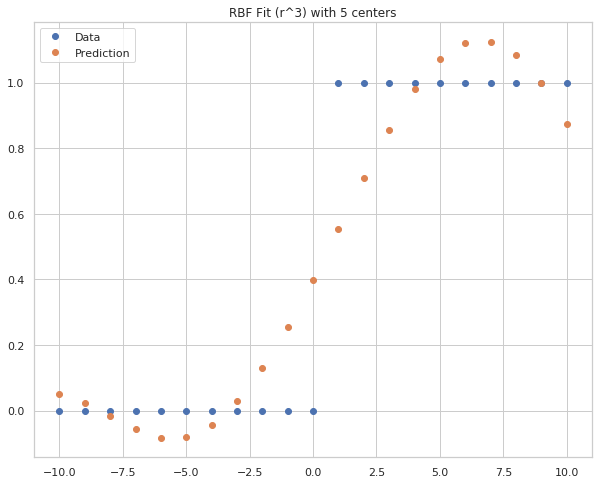

Mean squared error (in sample): 0.029756141390931794


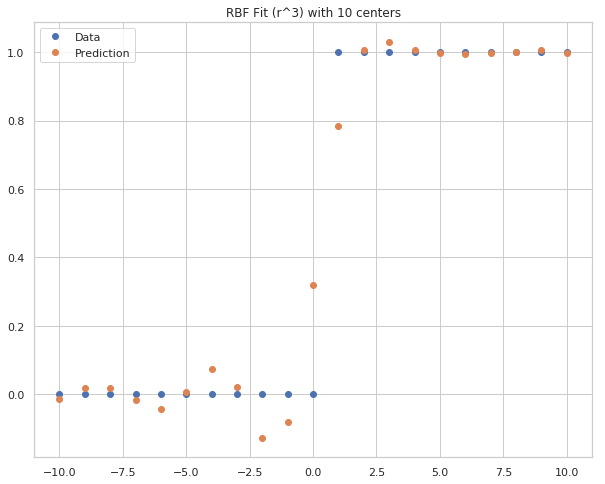

Mean squared error (in sample): 0.008629484686481507


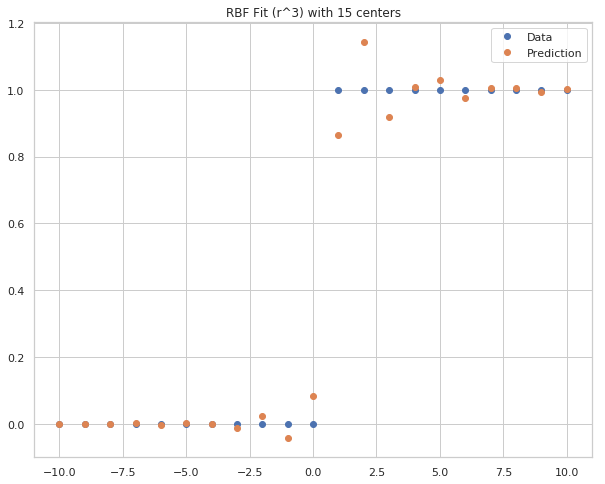

Mean squared error (in sample): 0.0027021660450248395


In [379]:
for rank in [5, 10, 15]:
    c, a = RBF_fit(X, Y, rank)
    predict = np.array([RBF_predict(x, c, a) for x in X])
    
    plt.plot(X, Y, 'o')
    plt.plot(X, predict, 'o')
    plt.legend(['Data', 'Prediction'])
    plt.title("RBF Fit (r^3) with %d centers" % rank)
    plt.show()
    
    error = np.mean((predict - Y) ** 2)
    print("Mean squared error (in sample):", error)

## (c) Out of sample performance

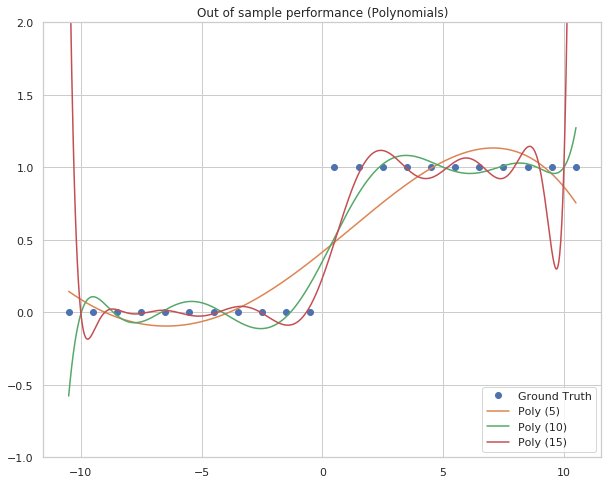

Error for Polynomial Fit (5 terms):	 0.037418004376817283
Error for Polynomial Fit (10 terms):	 0.03497768433217678
Error for Polynomial Fit (15 terms):	 4.391779493179244


In [380]:
x_out = np.linspace(-10.5, 10.5, 22)
x_vis = np.linspace(-10.5, 10.5, 1000)
y_out = [0 if x <= 0 else 1 for x in x_out]

colors = sns.color_palette()
ranks = [5, 10, 15]

plt.plot(x_out, y_out, 'o', color=colors[0])
plt.title("Out of sample performance (Polynomials)")
plt.ylim(-1, 2)

errors = []

# polynom fit
for i in range(3):
    rank = ranks[i]
    coeff = polynom_fit(X, Y, rank)
    predict = np.array([polynom_predict(x, coeff) for x in x_out])
    y_vis = np.array([polynom_predict(x, coeff) for x in x_vis])
    
    plt.plot(x_vis, y_vis, color=colors[i + 1])
    
    error = np.mean((predict - y_out) ** 2)
    errors.append(error)
    
plt.legend(['Ground Truth', 'Poly (5)', 'Poly (10)', 'Poly (15)'])
plt.show()

print("Error for Polynomial Fit (5 terms):\t", errors[0])
print("Error for Polynomial Fit (10 terms):\t", errors[1])
print("Error for Polynomial Fit (15 terms):\t", errors[2])

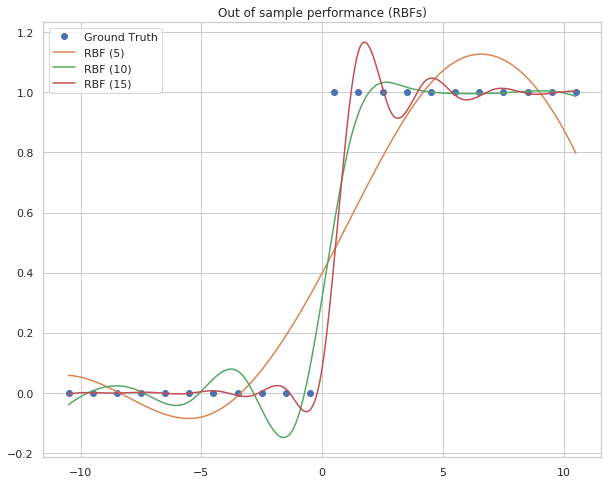

Error for RBF Fit (5 centers):	 0.0326876099147709
Error for RBF Fit (10 centers):	 0.010861016784034101
Error for RBF Fit (15 centers):	 0.01543128976687474


In [381]:
plt.plot(x_out, y_out, 'o', color=colors[0])
plt.title("Out of sample performance (RBFs)")

errors = []

# polynom fit
for i in range(3):
    rank = ranks[i]
    
    c, a = RBF_fit(X, Y, rank)
    predict = np.array([RBF_predict(x, c, a) for x in x_out])
    y_vis = np.array([RBF_predict(x, c, a) for x in x_vis])
    
    plt.plot(x_vis, y_vis, color=colors[i + 1])
    
    error = np.mean((predict - y_out) ** 2)
    errors.append(error)
    
plt.legend(['Ground Truth', 'RBF (5)', 'RBF (10)', 'RBF (15)'])
plt.show()

print("Error for RBF Fit (5 centers):\t", errors[0])
print("Error for RBF Fit (10 centers):\t", errors[1])
print("Error for RBF Fit (15 centers):\t", errors[2])

## (d) Curvature regularizer

I'm going to try and use sympy to derive, integrate and solve, so first let's do it step by step for a 5 term polynomial

In [382]:
from sympy import *

In [383]:
# prepare polynomial
degree = 5
x, a = symbols("x a")
f = Indexed('a',0)
for i in range(1, degree):
    f = f + Indexed('a',i) * (x ** i)
f

x**4*a[4] + x**3*a[3] + x**2*a[2] + x*a[1] + a[0]

In [384]:
df = diff(f, x)
df

4*x**3*a[4] + 3*x**2*a[3] + 2*x*a[2] + a[1]

In [385]:
ddf = diff(df, x)
ddf

12*x**2*a[4] + 6*x*a[3] + 2*a[2]

In [386]:
right = integrate(ddf**2, (x, -10, 10))
right

80*a[2]**2 + 32000*a[2]*a[4] + 24000*a[3]**2 + 5760000*a[4]**2

In [387]:
left = 0
for i in range(len(Y)):
    left += (Y[i] - f.subs(x, X[i])) ** 2
left = simplify(left)
left

21*a[0]**2 + 1540*a[0]*a[2] + 101332*a[0]*a[4] - 20*a[0] + 770*a[1]**2 + 101332*a[1]*a[3] - 110*a[1] + 50666*a[2]**2 + 7913620*a[2]*a[4] - 770*a[2] + 3956810*a[3]**2 - 6050*a[3] + 335462666*a[4]**2 - 50666*a[4] + 10

In [388]:
lambd = 0.1
I = left + lambd * right
system = []
for i in range(degree):
    dIda = diff(I, Indexed('a',i))
    system.append(dIda)
system

[42*a[0] + 1540*a[2] + 101332*a[4] - 20,
 1540*a[1] + 101332*a[3] - 110,
 1540*a[0] + 101348.0*a[2] + 7916820.0*a[4] - 770,
 101332*a[1] + 7918420.0*a[3] - 6050,
 101332*a[0] + 7916820.0*a[2] + 672077332.0*a[4] - 50666]

In [389]:
sol = solve(system, dict=True)
sol

[{a[0]: 0.415934776553056,
  a[1]: 0.133926172914499,
  a[2]: 0.00359861417898801,
  a[3]: -0.000949811572734460,
  a[4]: -2.97154546527246e-5}]

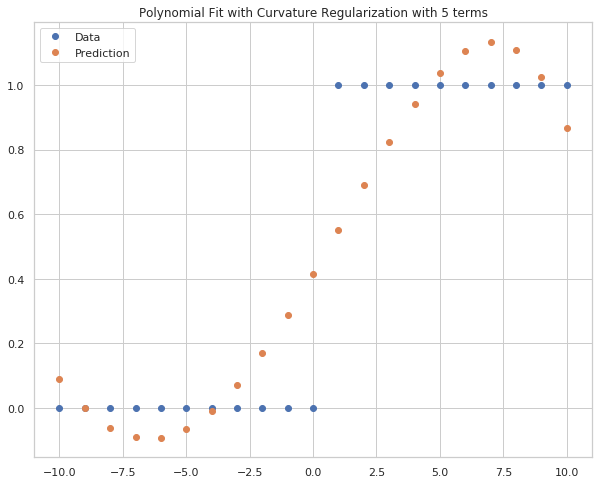

Mean squared error (in sample): 0.03394155818872691


In [390]:
coeff = np.zeros(degree)
for i in range(degree):
    coeff[i] = sol[0][Indexed('a',i)]

predict = np.array([polynom_predict(x, coeff) for x in X])
    
plt.plot(X, Y, 'o')
plt.plot(X, predict, 'o')
plt.legend(['Data', 'Prediction'])
plt.title("Polynomial Fit with Curvature Regularization with %d terms" % degree)
plt.show()

error = np.mean((predict - Y) ** 2)
print("Mean squared error (in sample):", error)

In [391]:
def polynom_regularized_fit(X, Y, degree, lambd, integ_domain=(-10, 10)):
    x, a = symbols("x a")
    f = Indexed('a',0)
    for i in range(1, degree):
        f = f + Indexed('a',i) * (x ** i)
        
    df = diff(f, x)
    ddf = diff(df, x)
    
    right = integrate(ddf**2, (x, integ_domain[0], integ_domain[1]))
    
    left = 0
    for i in range(len(Y)):
        left += (Y[i] - f.subs(x, X[i])) ** 2
    left = simplify(left)
    
    I = left + lambd * right
    system = []
    for i in range(degree):
        dIda = diff(I, Indexed('a',i))
        system.append(dIda)
    
    sol = solve(system, dict=True)
    
    coeff = np.zeros(degree)
    for i in range(degree):
        coeff[i] = sol[0][Indexed('a',i)]
        
    return coeff

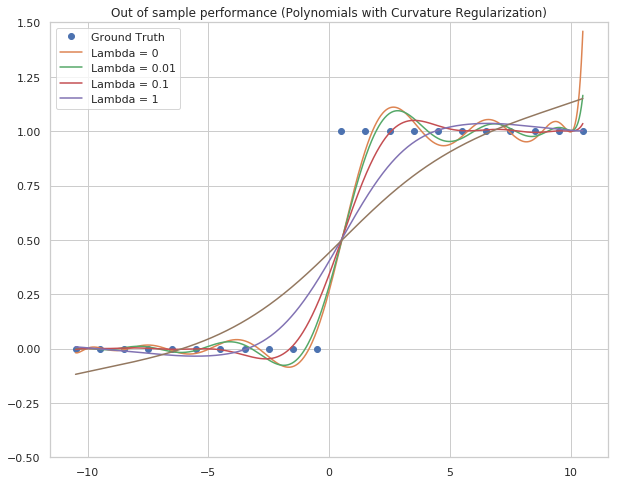

Error for Lambda = 0:		 0.023773381091605296
Error for Lambda = 0.01:	 0.015278746396171095
Error for Lambda = 0.1:		 0.01561114723230335
Error for Lambda = 1:		 0.022923101989995476
[0.023773381091605296, 0.015278746396171095, 0.01561114723230335, 0.022923101989995476, 0.04207856962142806]


In [395]:
degree = 15

plt.plot(x_out, y_out, 'o', color=colors[0])
plt.title("Out of sample performance (Polynomials with Curvature Regularization)")
plt.ylim(-1, 2)
plt.ylim(-0.5, 1.5)

errors = []

lambdas = [0.01, 0.1, 1, 10, 100]

for i in range(len(lambdas)):
    lambd = lambdas[i]
    
    coeff = polynom_regularized_fit(X, Y, degree, lambd)
    predict = np.array([polynom_predict(x, coeff) for x in x_out])
    y_vis = np.array([polynom_predict(x, coeff) for x in x_vis])
    
    plt.plot(x_vis, y_vis, color=colors[i + 1])
    
    error = np.mean((predict - y_out) ** 2)
    errors.append(error)
    
plt.legend(['Ground Truth', 'Lambda = 0', 'Lambda = 0.01', 'Lambda = 0.1', 'Lambda = 1'])
plt.show()

print("Error for Lambda = 0:\t\t", errors[0])
print("Error for Lambda = 0.01:\t", errors[1])
print("Error for Lambda = 0.1:\t\t", errors[2])
print("Error for Lambda = 1:\t\t", errors[3])

print(errors)

In [394]:
errors[4]

0.022923101989995476

## Conclusion:
**15 Terms Polynomial with Curvature Regularizer ($\lambda=0.1$) is comparable with 15 RBF ($r^3$)**

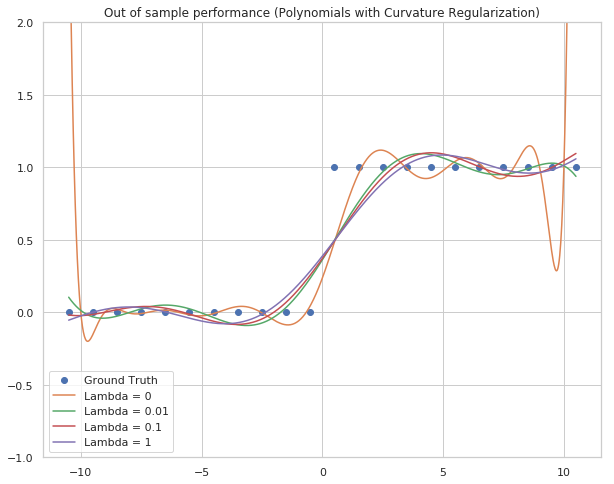

Error for Lambda = 0:		 4.581968127894955
Error for Lambda = 0.01:	 0.0191014567704912
Error for Lambda = 0.1:		 0.02070527358918754
Error for Lambda = 1:		 0.021831414018453114


In [176]:
# Different integration domain

degree = 15

plt.plot(x_out, y_out, 'o', color=colors[0])
plt.title("Out of sample performance (Polynomials with Curvature Regularization)")
plt.ylim(-1, 2)

errors = []

lambdas = [0, 0.01, 0.1, 1]

for i in range(len(lambdas)):
    lambd = lambdas[i]
    
    coeff = polynom_regularized_fit(X, Y, degree, lambd, integ_domain=(-20, 20))
    predict = np.array([polynom_predict(x, coeff) for x in x_out])
    y_vis = np.array([polynom_predict(x, coeff) for x in x_vis])
    
    plt.plot(x_vis, y_vis, color=colors[i + 1])
    
    error = np.mean((predict - y_out) ** 2)
    errors.append(error)
    
plt.legend(['Ground Truth', 'Lambda = 0', 'Lambda = 0.01', 'Lambda = 0.1', 'Lambda = 1'])
plt.show()

print("Error for Lambda = 0:\t\t", errors[0])
print("Error for Lambda = 0.01:\t", errors[1])
print("Error for Lambda = 0.1:\t\t", errors[2])
print("Error for Lambda = 1:\t\t", errors[3])

**Seems sensitive to the choice of intergration domain**

# (14.3)

In [355]:
# for M = 4, we know from Table (6.1) that the relevant bits are 1 and 4
lag = np.array([1, 0, 0, 1])
state = np.array([1, 1, 1, 1])

def lfsr():
    global state
    x = np.dot(lag, state) % 2
    state[0] = x # replace the oldest element with the newest
    state = np.roll(state, -1) # roll the state so the newest element is now in its proper position
    return x

## Generate dataset

Every X is the history of the last $k$ bits seen. And $y$ is the new bit.
For LFSR of max order 4, no reason to set $k$ bigger than 4. 

I generate a dataset which contains a subset of the existing LFSR, and test on the remaining

In [396]:
x_dim = 4 # how many bits are in each x
training_size = 11    # size of training dataset
testing_size = 4    # size of testing dataset

X = []
Y = []

x = []
for i in range(x_dim):
    x.append(lfsr())

for i in range(training_size):
    y = lfsr()
    
    X.append(x.copy())
    Y.append(y)
    
    x.append(y)
    x.pop(0)
    
X = np.array(X)
Y = np.expand_dims(np.array(Y), axis=1)

print("Training:")
print(X.shape)
print(Y.shape)

X_test = []
Y_test = []

for i in range(testing_size):
    y = lfsr()
    
    X_test.append(x.copy())
    Y_test.append(y)
    
    x.append(y)
    x.pop(0)

X_test = np.array(X_test)
Y_test = np.expand_dims(np.array(Y_test), axis=1)

print("Testing:")
print(X_test.shape)
print(Y_test.shape)

Training:
(11, 4)
(11, 1)
Testing:
(4, 4)
(4, 1)


## DIY neural network

After messing around with building my own NN from scratch, I resorted to using one of the many codes lying around the web. The ReLU and Dense layers are copied as is from https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9

To keep it simple, I implemented a Sigmoid layer (to keep the output between 0 and 1). And a simple squared error loss.

In [397]:
class ReLU():
    def __init__(self):
        # ReLU layer simply applies elementwise rectified linear unit to all inputs
        pass
    
    def forward(self, input):
        # Apply elementwise ReLU to [batch, input_units] matrix
        relu_forward = np.maximum(0,input)
        return relu_forward
    
    def backward(self, input, grad_output):
        # Compute gradient of loss w.r.t. ReLU input
        relu_grad = input > 0
        return grad_output * relu_grad
    
class Dense():
    def __init__(self, input_units, output_units, learning_rate=0.1):
        # A dense layer is a layer which performs a learned affine transformation:
        # f(x) = <W*x> + b
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        # Perform an affine transformation:
        # f(x) = <W*x> + b
        
        # input shape: [batch, input_units]
        # output shape: [batch, output units]
        return np.dot(input,self.weights) + self.biases
    
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0)*input.shape[0]
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

class Sigmoid():
    def __init__(self):
        pass
    
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, input):
        return sigmoid(input)
    
    def backward(self, input, grad_output):
        # Compute gradient of loss w.r.t. ReLU input
        grad = sigmoid(input) * (1 - sigmoid(input))
        return grad_output * grad

def forward(network, X):
    # Compute activations of all network layers by applying them sequentially.
    # Return a list of activations for each layer. 
    
    activations = []
    input = X
    # Looping through each layer
    for l in network:
        activations.append(l.forward(input))
        # Updating input to last layer output
        input = activations[-1]
    
    assert len(activations) == len(network)
    return activations


def squared_error_loss(y_true, y_predict):
    return (y_true - y_predict) ** 2

def grad_squared_error_loss(y_true, y_predict):
    return -2 * (y_true - y_predict)

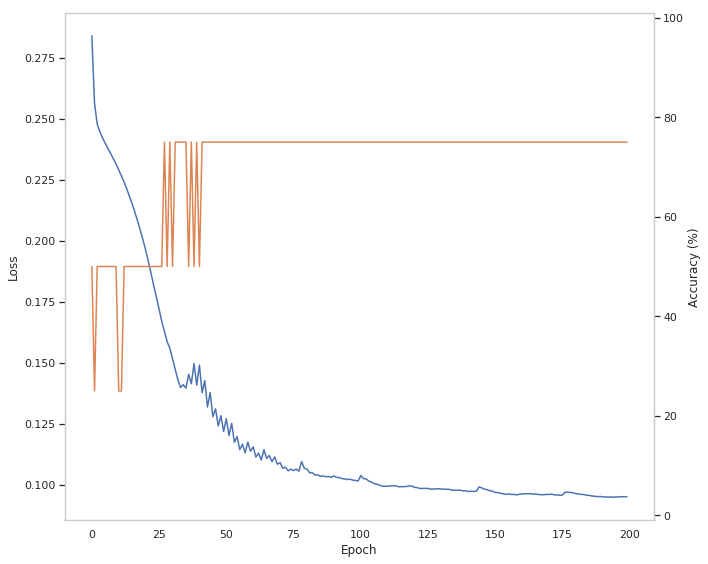

In [398]:
# Let's try a 2 hidden layers, with 10 neurons each
epochs = 200

network = []
network.append(Dense(x_dim,10))
network.append(ReLU())
network.append(Dense(10,10))
network.append(ReLU())
network.append(Dense(10,1))
network.append(Sigmoid())

colors = sns.color_palette()

losses = []
accuracies = []
for i in range(epochs):
    layer_activations = forward(network, X)
    layer_inputs = [X] + layer_activations  #layer_input[i] is an input for network[i]
    output = layer_activations[-1]

    # calc mean loss
    mean_loss = np.mean(squared_error_loss(Y, output))
    losses.append(mean_loss)
    
    # calc test accuracy
    predict = np.round(forward(network, X_test)[-1])
    accuracy = 1 - (np.sum(np.abs(predict - Y_test)) / Y_test.shape[0])
    accuracies.append(accuracy * 100)
    
    # gradient loss
    loss_grad = grad_squared_error_loss(Y, output)
    
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
    
e = np.arange(epochs)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(e, losses, color=colors[0])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Accuracy (%)')  # we already handled the x-label with ax1
ax2.set_ylim(-1, 101)
ax2.plot(e, accuracies, color=colors[1])

ax1.grid()
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

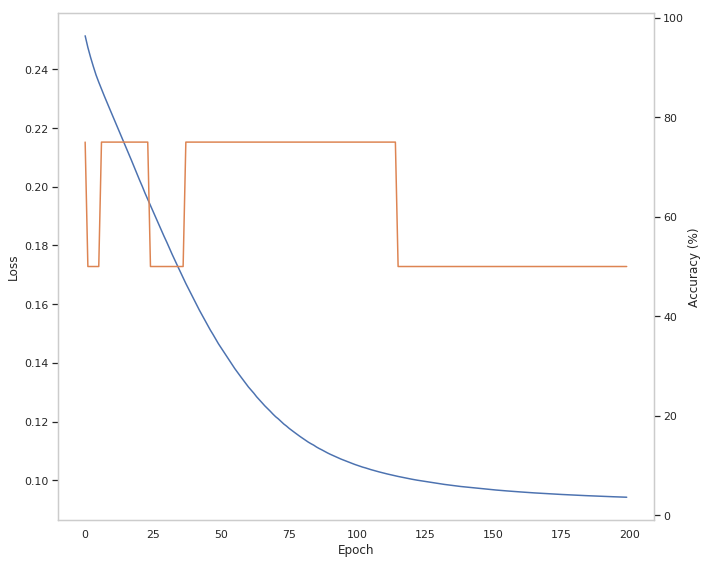

In [399]:
# Let's try ONE hidden layer, with 10 neurons each
epochs = 200

network = []
network.append(Dense(x_dim,10))
network.append(ReLU())
network.append(Dense(10,1))
network.append(Sigmoid())

colors = sns.color_palette()

losses = []
accuracies = []
for i in range(epochs):
    layer_activations = forward(network, X)
    layer_inputs = [X] + layer_activations  #layer_input[i] is an input for network[i]
    output = layer_activations[-1]

    # calc mean loss
    mean_loss = np.mean(squared_error_loss(Y, output))
    losses.append(mean_loss)
    
    # calc test accuracy
    predict = np.round(forward(network, X_test)[-1])
    accuracy = 1 - (np.sum(np.abs(predict - Y_test)) / Y_test.shape[0])
    accuracies.append(accuracy * 100)
    
    # gradient loss
    loss_grad = grad_squared_error_loss(Y, output)
    
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
    
e = np.arange(epochs)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(e, losses, color=colors[0])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Accuracy (%)')  # we already handled the x-label with ax1
ax2.set_ylim(-1, 101)
ax2.plot(e, accuracies, color=colors[1])

ax1.grid()
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

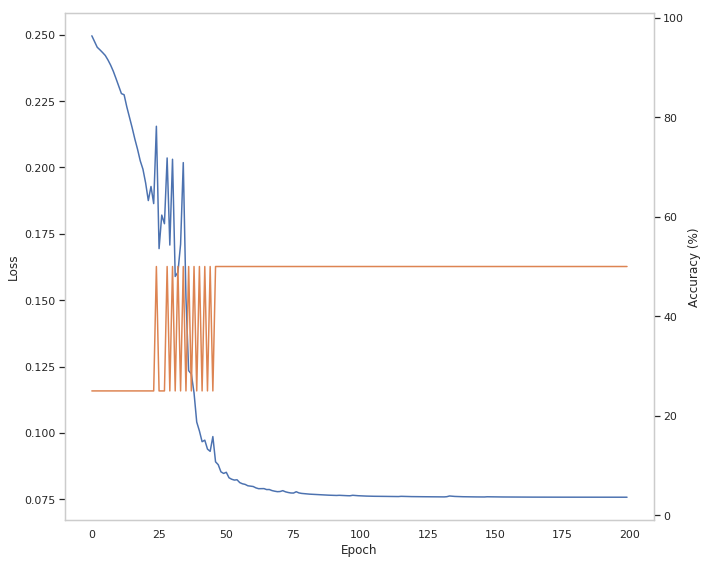

In [333]:
# Let's try a 3 hidden layers, with 5 neurons each
epochs = 200

network = []
network.append(Dense(x_dim,5))
network.append(ReLU())
network.append(Dense(5,5))
network.append(ReLU())
network.append(Dense(5,5))
network.append(ReLU())
network.append(Dense(5,1))
network.append(Sigmoid())

colors = sns.color_palette()

losses = []
accuracies = []
for i in range(epochs):
    layer_activations = forward(network, X)
    layer_inputs = [X] + layer_activations  #layer_input[i] is an input for network[i]
    output = layer_activations[-1]

    # calc mean loss
    mean_loss = np.mean(squared_error_loss(Y, output))
    losses.append(mean_loss)
    
    # calc test accuracy
    predict = np.round(forward(network, X_test)[-1])
    accuracy = 1 - (np.sum(np.abs(predict - Y_test)) / Y_test.shape[0])
    accuracies.append(accuracy * 100)
    
    # gradient loss
    loss_grad = grad_squared_error_loss(Y, output)
    
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
    
e = np.arange(epochs)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(e, losses, color=colors[0])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Accuracy (%)')  # we already handled the x-label with ax1
ax2.set_ylim(-1, 101)
ax2.plot(e, accuracies, color=colors[1])

ax1.grid()
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Let's try with a bigger dataset... LFSR order 12

In [361]:
lfsr_order = 12

lag = np.array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])
state = np.ones(lfsr_order)

x_dim = lfsr_order # how many bits are in each x
training_size = int(2**lfsr_order * 0.9)    # size of training dataset
testing_size = int(2 ** lfsr_order * 0.1)    # size of testing dataset

X = []
Y = []

x = []
for i in range(x_dim):
    x.append(lfsr())

for i in range(training_size):
    y = lfsr()
    
    X.append(x.copy())
    Y.append(y)
    
    x.append(y)
    x.pop(0)
    
X = np.array(X)
Y = np.expand_dims(np.array(Y), axis=1)

print("Training:")
print(X.shape)
print(Y.shape)

X_test = []
Y_test = []

for i in range(testing_size):
    y = lfsr()
    
    X_test.append(x.copy())
    Y_test.append(y)
    
    x.append(y)
    x.pop(0)

X_test = np.array(X_test)
Y_test = np.expand_dims(np.array(Y_test), axis=1)

print("Testing:")
print(X_test.shape)
print(Y_test.shape)

Training:
(3686, 12)
(3686, 1)
Testing:
(409, 12)
(409, 1)


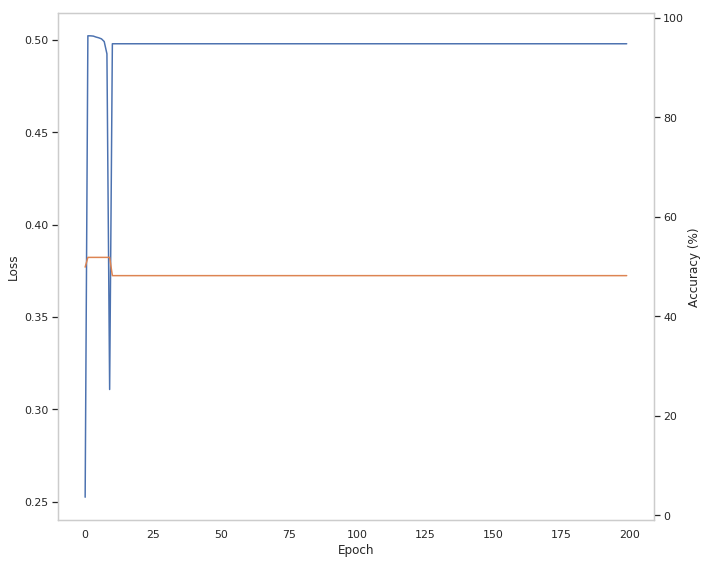

In [362]:
# Let's try 2 hidden layers, with 12 neurons each
epochs = 200
learning_rate = 0.1

network = []
network.append(Dense(x_dim, 12, learning_rate=learning_rate))
network.append(ReLU())
network.append(Dense(12, 12, learning_rate))
network.append(ReLU())
network.append(Dense(12, 1, learning_rate))
network.append(Sigmoid())

colors = sns.color_palette()

losses = []
accuracies = []
for i in range(epochs):
    layer_activations = forward(network, X)
    layer_inputs = [X] + layer_activations  #layer_input[i] is an input for network[i]
    output = layer_activations[-1]

    # calc mean loss
    mean_loss = np.mean(squared_error_loss(Y, output))
    losses.append(mean_loss)
    
    # calc test accuracy
    predict = np.round(forward(network, X_test)[-1])
    accuracy = 1 - (np.sum(np.abs(predict - Y_test)) / Y_test.shape[0])
    accuracies.append(accuracy * 100)
    
    # gradient loss
    loss_grad = grad_squared_error_loss(Y, output)
    
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
    
e = np.arange(epochs)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(e, losses, color=colors[0])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Accuracy (%)')  # we already handled the x-label with ax1
ax2.set_ylim(-1, 101)
ax2.plot(e, accuracies, color=colors[1])

ax1.grid()
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**Not learning anything... Need to REDUCE the learning rate...**

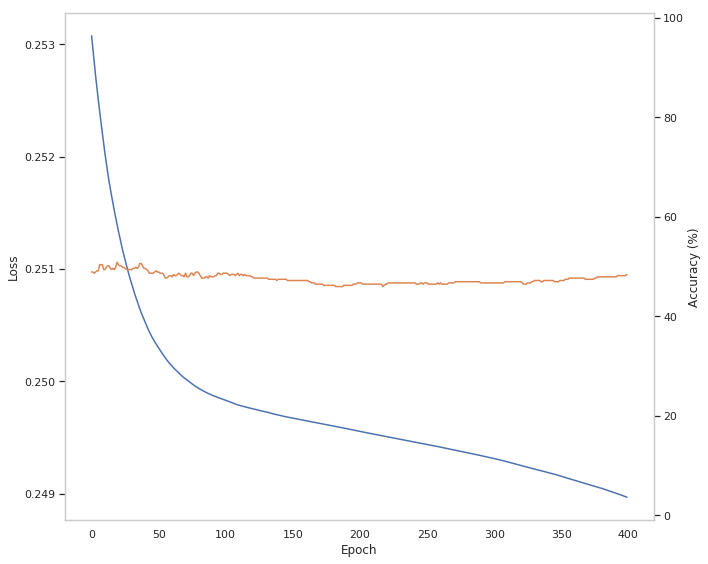

In [367]:
# Let's try 2 hidden layers, with 12 neurons each
epochs = 400
learning_rate = 0.0001

network = []
network.append(Dense(x_dim, 12, learning_rate=learning_rate))
network.append(ReLU())
network.append(Dense(12, 12, learning_rate))
network.append(ReLU())
network.append(Dense(12, 1, learning_rate))
network.append(Sigmoid())

colors = sns.color_palette()

losses = []
accuracies = []
for i in range(epochs):
    layer_activations = forward(network, X)
    layer_inputs = [X] + layer_activations  #layer_input[i] is an input for network[i]
    output = layer_activations[-1]

    # calc mean loss
    mean_loss = np.mean(squared_error_loss(Y, output))
    losses.append(mean_loss)
    
    # calc test accuracy
    predict = np.round(forward(network, X_test)[-1])
    accuracy = 1 - (np.sum(np.abs(predict - Y_test)) / Y_test.shape[0])
    accuracies.append(accuracy * 100)
    
    # gradient loss
    loss_grad = grad_squared_error_loss(Y, output)
    
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
    
e = np.arange(epochs)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(e, losses, color=colors[0])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Accuracy (%)')  # we already handled the x-label with ax1
ax2.set_ylim(-1, 101)
ax2.plot(e, accuracies, color=colors[1])

ax1.grid()
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

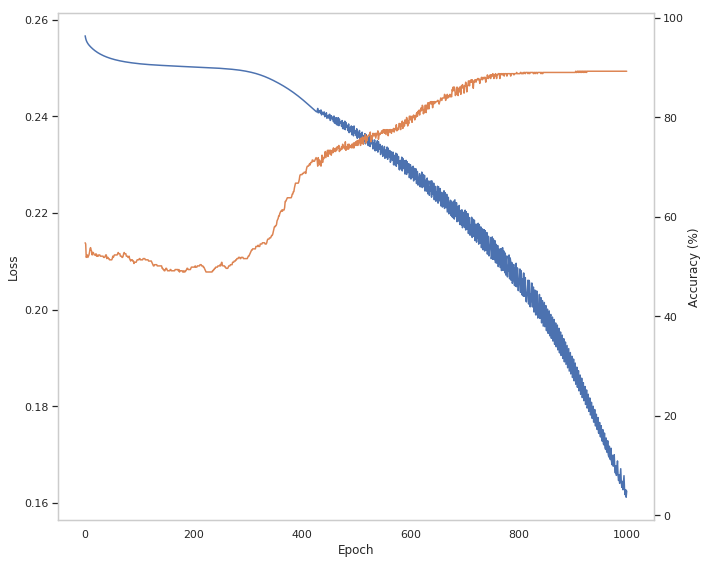

In [369]:
# Let's try a single hidden layers, with 24 neurons
epochs = 1000
learning_rate = 0.0001

network = []
network.append(Dense(x_dim, 24, learning_rate=learning_rate))
network.append(ReLU())
network.append(Dense(24, 1, learning_rate))
network.append(Sigmoid())

colors = sns.color_palette()

losses = []
accuracies = []
for i in range(epochs):
    layer_activations = forward(network, X)
    layer_inputs = [X] + layer_activations  #layer_input[i] is an input for network[i]
    output = layer_activations[-1]

    # calc mean loss
    mean_loss = np.mean(squared_error_loss(Y, output))
    losses.append(mean_loss)
    
    # calc test accuracy
    predict = np.round(forward(network, X_test)[-1])
    accuracy = 1 - (np.sum(np.abs(predict - Y_test)) / Y_test.shape[0])
    accuracies.append(accuracy * 100)
    
    # gradient loss
    loss_grad = grad_squared_error_loss(Y, output)
    
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
    
e = np.arange(epochs)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(e, losses, color=colors[0])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Accuracy (%)')  # we already handled the x-label with ax1
ax2.set_ylim(-1, 101)
ax2.plot(e, accuracies, color=colors[1])

ax1.grid()
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

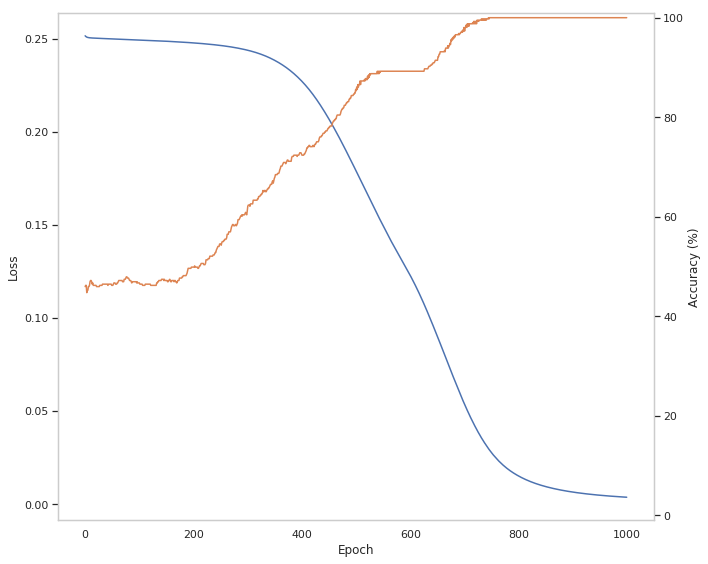

In [371]:
# Let's try 2 hidden layers, with 24 neurons each
epochs = 1000
learning_rate = 0.0001

network = []
network.append(Dense(x_dim, 24, learning_rate=learning_rate))
network.append(ReLU())
network.append(Dense(24, 24, learning_rate))
network.append(ReLU())
network.append(Dense(24, 1, learning_rate))
network.append(Sigmoid())

colors = sns.color_palette()

losses = []
accuracies = []
for i in range(epochs):
    layer_activations = forward(network, X)
    layer_inputs = [X] + layer_activations  #layer_input[i] is an input for network[i]
    output = layer_activations[-1]

    # calc mean loss
    mean_loss = np.mean(squared_error_loss(Y, output))
    losses.append(mean_loss)
    
    # calc test accuracy
    predict = np.round(forward(network, X_test)[-1])
    accuracy = 1 - (np.sum(np.abs(predict - Y_test)) / Y_test.shape[0])
    accuracies.append(accuracy * 100)
    
    # gradient loss
    loss_grad = grad_squared_error_loss(Y, output)
    
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
    
e = np.arange(epochs)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(e, losses, color=colors[0])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Accuracy (%)')  # we already handled the x-label with ax1
ax2.set_ylim(-1, 101)
ax2.plot(e, accuracies, color=colors[1])

ax1.grid()
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

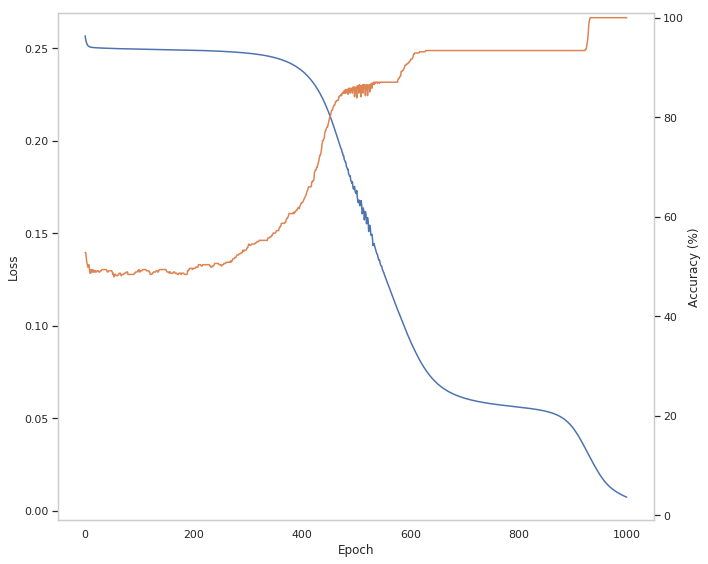

In [372]:
# Let's try 3 hidden layers, with 12 neurons each
epochs = 1000
learning_rate = 0.0001

network = []
network.append(Dense(x_dim, 12, learning_rate=learning_rate))
network.append(ReLU())
network.append(Dense(12, 12, learning_rate))
network.append(ReLU())
network.append(Dense(12, 12, learning_rate))
network.append(ReLU())
network.append(Dense(12, 1, learning_rate))
network.append(Sigmoid())

colors = sns.color_palette()

losses = []
accuracies = []
for i in range(epochs):
    layer_activations = forward(network, X)
    layer_inputs = [X] + layer_activations  #layer_input[i] is an input for network[i]
    output = layer_activations[-1]

    # calc mean loss
    mean_loss = np.mean(squared_error_loss(Y, output))
    losses.append(mean_loss)
    
    # calc test accuracy
    predict = np.round(forward(network, X_test)[-1])
    accuracy = 1 - (np.sum(np.abs(predict - Y_test)) / Y_test.shape[0])
    accuracies.append(accuracy * 100)
    
    # gradient loss
    loss_grad = grad_squared_error_loss(Y, output)
    
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
    
e = np.arange(epochs)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(e, losses, color=colors[0])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Accuracy (%)')  # we already handled the x-label with ax1
ax2.set_ylim(-1, 101)
ax2.plot(e, accuracies, color=colors[1])

ax1.grid()
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()